In [5]:
import pandas as pd
import numpy as np

match = pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

print(match.head)

match.shape


<bound method NDFrame.head of         id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

         

(756, 18)

In [4]:
print(delivery.head)

<bound method NDFrame.head of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman non

In [6]:
delivery.shape

(179078, 21)

In [8]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [11]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [18]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [20]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [21]:
match_df.shape

(641, 20)

In [22]:
match_df = match_df[match_df['dl_applied'] == 0]

In [23]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [24]:
delivery_df = match_df.merge(delivery,on='match_id')

In [25]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [60]:
print(delivery_df.columns)

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'balls_left',
       'result'],
      dtype='object')


In [61]:
delivery_df.shape

(72413, 26)

In [63]:
delivery_df[current_score]=delivery_df.groupby('match_id').cumsum()['total_run_y']

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [64]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

KeyError: 'current_score'

In [68]:
# Ensure 'total_runs_y' is numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Handle NaN values in 'total_runs_y'
delivery_df['total_runs_y'].fillna(0, inplace=True)

# Compute cumulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19584\435146267.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df['total_runs_y'].fillna(0, inplace=True)


In [69]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [70]:
delivery_df.shape

(72413, 28)

In [71]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [72]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,result,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,119,0,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,118,0,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,117,0,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,116,0,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,115,0,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,1,NaN,NaN,4,0,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,1,NaN,NaN,3,0,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,2,0,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,1,NaN,NaN,1,0,157,-5


In [73]:
print(delivery_df.columns)

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'balls_left', 'result',
       'current_score', 'runs_left'],
      dtype='object')


In [74]:
# Identify duplicate columns in delivery_df
duplicate_columns = []
columns = delivery_df.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if delivery_df[columns[i]].equals(delivery_df[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

if duplicate_columns:
    print("Duplicate columns found:")
    for col_pair in duplicate_columns:
        print(f"Columns {col_pair[0]} and {col_pair[1]} are identical.")
else:
    print("No duplicate columns found.")


No duplicate columns found.


In [91]:
# Ensure 'player_dismissed' is numeric
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 1 if x != "0" else 0).astype(int)

# Calculate cumulative dismissals for each match
delivery_df['cumsum_dismissed'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate remaining wickets
delivery_df['wickets'] = 10 - delivery_df['cumsum_dismissed']
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,balls_left,result,current_score,runs_left,crr,rrr,cumsum_dismissed,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,119,0,1,206,6.0,10.386555,1,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,118,0,1,206,3.0,10.474576,2,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,117,0,1,206,2.0,10.564103,3,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,116,0,3,204,4.5,10.551724,4,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,115,0,7,200,8.4,10.434783,5,5


In [92]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [93]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [94]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [95]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [96]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [97]:
final_df = final_df.sample(final_df.shape[0])

In [98]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
28177,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,48,21,-95,157,6.606061,13.714286,0


In [99]:
final_df.dropna(inplace=True)

In [100]:
final_df = final_df[final_df['balls_left'] != 0]

In [107]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [108]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
38538,Kings XI Punjab,Kolkata Knight Riders,Chandigarh,183,117,7,183,0.000000,9.384615
105829,Mumbai Indians,Delhi Daredevils,Delhi,108,58,-58,190,7.935484,11.172414
11543,Kolkata Knight Riders,Rajasthan Royals,Jaipur,50,13,-104,196,8.186916,23.076923
84013,Mumbai Indians,Sunrisers Hyderabad,Mumbai,78,37,-77,178,7.228916,12.648649
41522,Kings XI Punjab,Kolkata Knight Riders,Kolkata,118,76,-36,200,11.181818,9.315789
...,...,...,...,...,...,...,...,...,...
92428,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,139,96,-14,170,7.750000,8.687500
128724,Kolkata Knight Riders,Chennai Super Kings,Kolkata,87,60,-53,184,9.700000,8.700000
141256,Chennai Super Kings,Rajasthan Royals,Jaipur,122,69,-41,158,4.235294,10.608696
37378,Mumbai Indians,Kolkata Knight Riders,Mumbai,84,66,-48,155,7.888889,7.636364


In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [117]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [118]:
pipe.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [119]:
y_pred = pipe.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7908753241292312

In [121]:
pipe.predict_proba(X_test)[10]

array([0.20082484, 0.79917516])

In [122]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [123]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [132]:
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,6,88.1,11.9
136,2,1,6,93.6,6.4
142,3,16,6,87.6,12.4
148,4,11,6,84.6,15.4
155,5,5,7,88.1,11.9
162,6,10,7,86.7,13.3
168,7,7,6,87.6,12.4
174,8,13,6,82.4,17.6
180,9,10,6,80.0,20.0
187,10,10,7,78.1,21.9


Text(0.5, 1.0, 'Target-178')

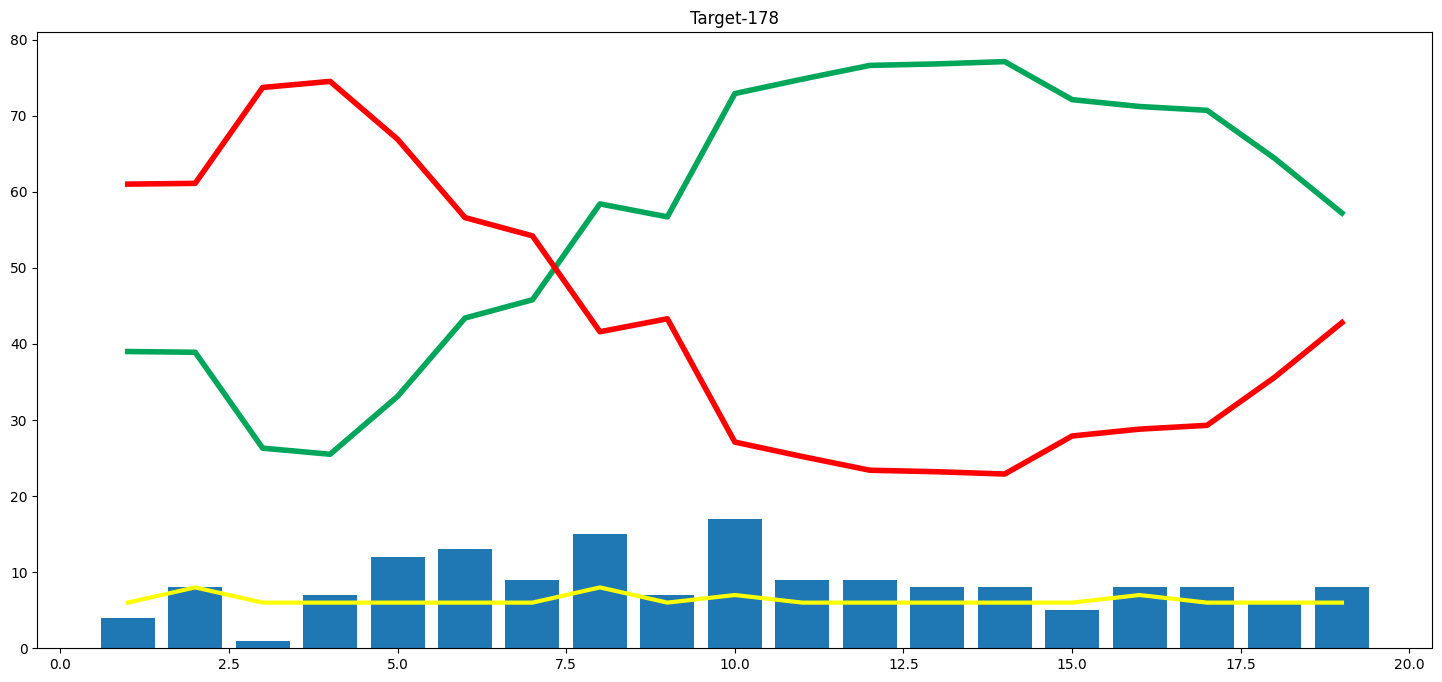

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [128]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [129]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [131]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))